# Covid-19 Radiology Segmentation & Classification
COMP 478 Project
<br>
Jeremy Gaudet
<br>
ID: 40045224
<br>
April 25, 2021

In [1]:
import tensorflow as tf
from tensorflow import keras
import cv2 as cv
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import pandas as pd
import numpy as np
from PIL import Image

import sys
import os
from glob import glob

In [2]:
# from google.colab import drive
# drive.mount('/content/gdrive')
# sys.path.append('/content/gdrive/My Drive/COMP478 Project/')
# %cd /content/gdrive/My Drive/COMP478 Project/

In [3]:
PATH = '/Users/jeremygaudet/Downloads/COVID-19_Radiography_Dataset'
BATCH_SIZE = 32
IMAGE_SIZE = (224,224)
IMAGE_WIDTH = IMAGE_SIZE[0]
IMAGE_HEIGHT = IMAGE_SIZE[1]
NUM_CLASSES = 4

In [4]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    PATH,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    # color_mode="grayscale",
    # label_mode="categorical"
    )

Found 21165 files belonging to 4 classes.
Using 16932 files for training.


In [5]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    PATH,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    # color_mode="grayscale",
    # label_mode="categorical"
    )

Found 21165 files belonging to 4 classes.
Using 4233 files for validation.


In [6]:
CLASS_NAMES = train_ds.class_names
print(CLASS_NAMES)

['COVID', 'Lung_Opacity', 'Normal', 'Viral Pneumonia']


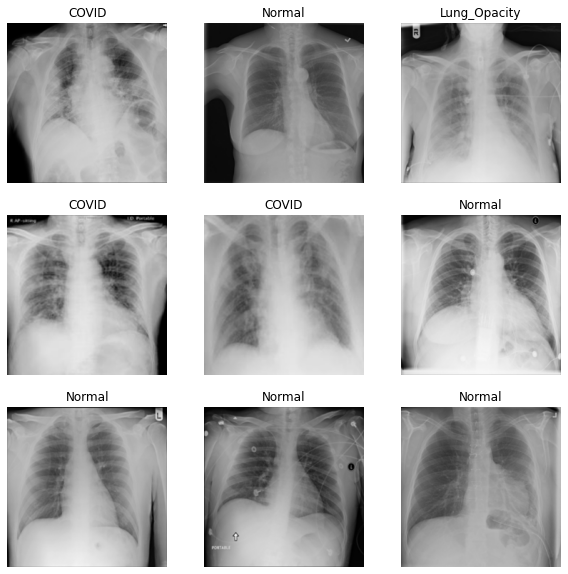

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(CLASS_NAMES[labels[i]])
        plt.axis("off")

In [8]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 224, 224, 3)
(32,)


In [9]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [10]:
from tensorflow.keras import layers

model = tf.keras.Sequential([
    layers.experimental.preprocessing.Rescaling(1./255),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(NUM_CLASSES)
])

In [11]:
model.compile(
    optimizer='adam',
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

In [12]:
hist = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)

Epoch 1/10
530/530 [==============================] - 134s 251ms/step - loss: 0.8933 - accuracy: 0.6394 - val_loss: 0.6393 - val_accuracy: 0.7418
Epoch 2/10
530/530 [==============================] - 138s 259ms/step - loss: 0.4846 - accuracy: 0.8150 - val_loss: 0.4646 - val_accuracy: 0.8190
Epoch 3/10
530/530 [==============================] - 138s 260ms/step - loss: 0.3650 - accuracy: 0.8617 - val_loss: 0.4540 - val_accuracy: 0.8280
Epoch 4/10
530/530 [==============================] - 142s 267ms/step - loss: 0.2847 - accuracy: 0.8916 - val_loss: 0.3846 - val_accuracy: 0.8627
Epoch 5/10
530/530 [==============================] - 140s 264ms/step - loss: 0.2216 - accuracy: 0.9161 - val_loss: 0.4665 - val_accuracy: 0.8552
Epoch 6/10
530/530 [==============================] - 141s 265ms/step - loss: 0.1719 - accuracy: 0.9344 - val_loss: 0.5000 - val_accuracy: 0.8438
Epoch 7/10
530/530 [==============================] - 144s 271ms/step - loss: 0.1341 - accuracy: 0.9482 - val_loss: 0.5210 -

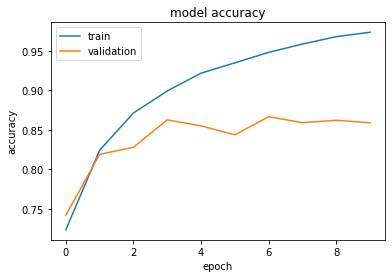

In [13]:
def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()

plot_hist(hist)

['COVID', 'Lung_Opacity', 'Normal', 'Viral Pneumonia']
[-0.665331   9.612412  -2.6908052 -0.7250386]
This image is Lung_Opacity with 9.61 percent confidence.


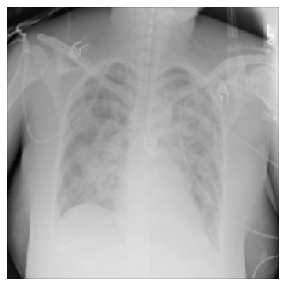

In [15]:
test_image_path = "/Users/jeremygaudet/Downloads/COVID-19_Radiography_Dataset/Lung_Opacity/Lung_Opacity-10.png"

img = keras.preprocessing.image.load_img(test_image_path, target_size=(IMAGE_WIDTH,IMAGE_HEIGHT,3))

# Plot image
plt.figure(figsize=(5, 5))
plt.imshow(img)
plt.axis("off")

# Preprocess image
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis
# Make predictions on images
predictions = model.predict(img_array)
score = predictions[0]
# Get index for highest confidence class
idx = np.argmax(score)

print(CLASS_NAMES)
print(score)

print(
    "This image is %s with %.2f percent confidence."
    % (str(CLASS_NAMES[idx]), score[idx])
)